<a href="https://colab.research.google.com/github/varunpothu/Research_Methods_Assignment/blob/main/R_M__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Project - Large Language Models**
---
* **Name :** Varun Pothu
* **Student ID :** 21080409
* **Subject ID :** 7PAM2015-0509-2023
* **Subject :** Research Methods in Data Science
---

**Brief and Aim of the Assignment:**
---

In this assignment, I aim to develop a text classification model to analyze and predict the sentiment of DEI-related articles. The goal is to train a BERT-style language model to classify the sentiment of articles based on their content and DEI topic. By fine-tuning the model using this dataset, I seek to enhance its ability to understand and categorize sentiments expressed in various DEI contexts.



**Problem Statement:**


---


Understanding the sentiment of DEI-related articles is crucial for gaining insights into public attitudes and discourse on Diversity, Equity, and Inclusion. I am tasked with developing a robust machine learning model to accurately predict the sentiment of these articles based on their content and associated DEI topics. By fine-tuning a BERT model on this dataset, I aim to improve automated sentiment analysis within the DEI domain, which can assist organizations and researchers in addressing and responding to DEI issues more effectively.

**Dataset Summary:**
---
The dataset includes articles related to Diversity, Equity, and Inclusion (DEI), encompassing columns such as title, content, URL, sentiment label, and basis. The basis column categorizes the underlying DEI topic into four types:

1.   Gender
2.   Race
3.   Disability
4.   Other

The sentiment label reflects the sentiment expressed in each article (e.g., positive, negative, neutral).



```
Dataset Link: https://huggingface.co/datasets/deancgarcia/Diversity
```



### Importing Libraries

In [1]:
pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
    

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# Load the dataset using Hugging Face's datasets
diversity_df = pd.read_csv("hf://datasets/deancgarcia/Diversity/train.csv")


# Display the first few rows
print(diversity_df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


    ID                                              Title  \
0    1  Census data: US is diversifying, white populat...   
1    2  Workplace Diversity and Inclusion Gets Innovative   
2  404  Future immigration will change the face of Ame...   
3  410  Early Benchmarks Show ‘Post-Millennials’ on Tr...   
4  412  Millennials overtake Baby Boomers as America’s...   

                                             Content  Basis  \
0  No racial or ethnic group dominates for those ...      2   
1  wont be long before U. S. minorities are not i...      2   
2  A snapshot of the United States in 2065 would ...      2   
3  As a new generation of Americans begins to tak...      2   
4  Millennials have surpassed Baby Boomers as the...      2   

                                                 URL  Sentiment  Unnamed: 6  
0  https://apnews.com/article/race-and-ethnicity-...      False       156.0  
1  https://www.shrm.org/hr-today/news/hr-magazine...       True         NaN  
2  https://www.pewre

In [4]:
diversity_df.head()

,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,156.0
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True,NaN
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True,NaN
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True,NaN
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True,NaN


### Data Investigation

Descriptive Statistics

In [5]:
# Display statistics for numerical columns
diversity_df.describe()

,ID,Basis,Unnamed: 6
count,482.000000,482.000000,1.0
mean,808.784232,2.510373,156.0
std,248.442874,0.738668,NaN
min,1.000000,1.000000,156.0
25%,584.250000,2.000000,156.0
50%,826.500000,3.000000,156.0
75%,1021.500000,3.000000,156.0
max,1299.000000,4.000000,156.0


In [6]:
# Display value counts for categorical columns
diversity_df['Sentiment'].value_counts()

,count
Sentiment,
False,326
True,156


 Checking for Missing Values

In [7]:
diversity_df.isnull().sum()

,0
ID,0
Title,0
Content,0
Basis,0
URL,0
Sentiment,0
Unnamed: 6,481


### Data Cleaning and Preprocessing

Handle Unwanted Data

In [8]:
# Drop the 'Unnamed: 6' column
diversity_df_cleaned = diversity_df.drop(columns=['Unnamed: 6'])

# Display the updated DataFrame
diversity_df_cleaned.head()


,ID,Title,Content,Basis,URL,Sentiment
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True


In [11]:
# First, split into train and test sets
train_df, test_df = train_test_split(diversity_df, test_size=0.2, random_state=123)


# Then, split the training set into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=123)

# Display the sizes of the resulting datasets
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")




Training set size: 346
Validation set size: 39
Test set size: 97
Training Set:


In [14]:
print("Training Set:")
train_df.head()

Training Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
179,725,It’s Time To Stop Even Casually Misusing Disab...,Words Have PowerContent warning: This article...,3,https://www.forbes.com/sites/andrewpulrang/202...,False,NaN
339,973,The Atlanta attacks were not just racist and m...,I am heartbroken but I’m not surprised. The ta...,2,https://theconversation.com/the-atlanta-attack...,False,NaN
116,580,30 Days of MD: Seeing Disability Through a Dif...,This is Matt DeEmilio’s story: My name is Matt...,3,https://musculardystrophynews.com/2021/09/02/3...,True,NaN
147,634,How To Find Your Disability Community,Disability CommunityThere seems to be a wide ...,3,https://www.forbes.com/sites/andrewpulrang/202...,True,NaN
438,1154,"As Minneapolis burns, Trump’s presidency is si...",Violence has erupted across several US cities ...,2,https://theconversation.com/as-minneapolis-bur...,False,NaN


In [15]:
print("\nValidation Set:")
val_df.head()



Validation Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
139,616,A chance to 'amplify one another': What is Dis...,"For Tiffany Yu, Disability Pride Month is abo...",3,https://www.usatoday.com/story/news/nation/202...,True,NaN
233,817,Pages and prejudice: how queer texts could fig...,"Recently, the Australian Association for the T...",1,https://theconversation.com/pages-and-prejudic...,False,NaN
133,602,Disability advocates calling for reform as US ...,Becca Meyers asked for her mother to be her p...,3,https://abcnews.go.com/Sports/disability-advoc...,False,NaN
323,949,Incels are surprisingly diverse but united by ...,Incels are a misogynistic online community lin...,2,https://theconversation.com/incels-are-surpris...,False,NaN
123,588,"Swimming superstar Ellie Cole on diversity, ac...",The six time gold medallist is campaigning fo...,3,https://www.theguardian.com/sport/2021/aug/19/...,True,NaN


In [16]:
print("\nTest Set:")
test_df.head()


Test Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
427,1133,How Hollywood’s ‘Alien’ and ‘Predator’ movies ...,What makes Black people more likely than other...,2,https://theconversation.com/how-hollywoods-ali...,False,NaN
414,1113,‘My vote will be Black’ – A wave of Afro-Brazi...,Messages urging Afro Brazilians to support Bla...,2,https://theconversation.com/my-vote-will-be-bl...,False,NaN
5,414,"Meet the US workforce of the future: Older, mo...",ARE you a US based organization searching for ...,2,https://www2.deloitte.com/us/en/insights/deloi...,True,NaN
369,1033,Worker with disability alleges inflexible retu...,The U. S. Equal Employment Opportunity Commis...,3,https://www.hrdive.com/news/worker-with-disabi...,False,NaN
400,1085,Series explores lived experiences around abili...,Explore campus at your own pace. Expanding W&...,3,https://www.wm.edu/news/stories/2020/series-fe...,True,NaN


###EDA Analysis

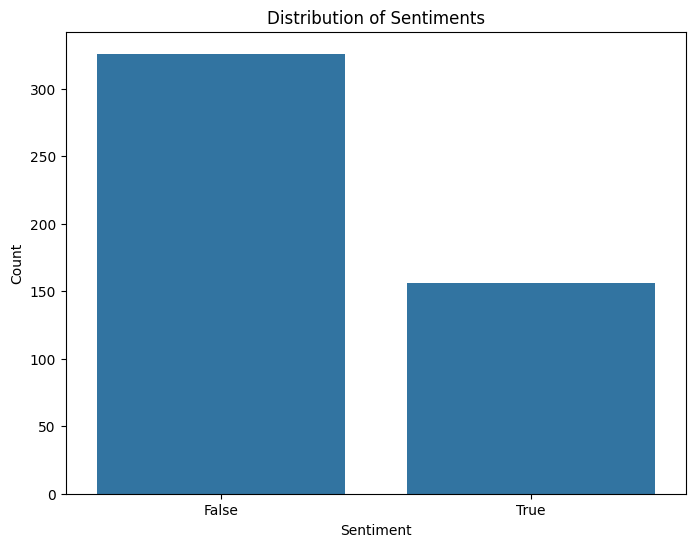

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=diversity_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


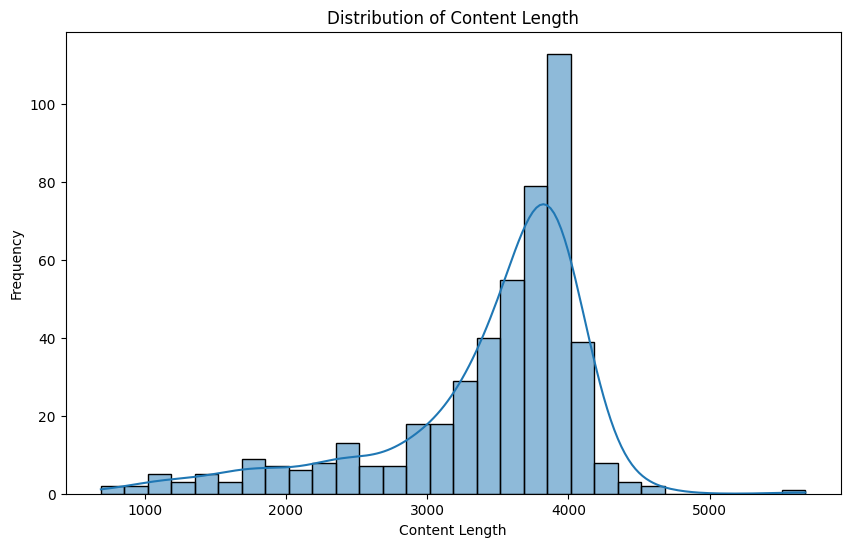

In [9]:
# Calculate the length of each content entry
diversity_df['Content_Length'] = diversity_df['Content'].apply(len)

# Plot distribution of content length
plt.figure(figsize=(10, 6))
sns.histplot(diversity_df['Content_Length'], bins=30, kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


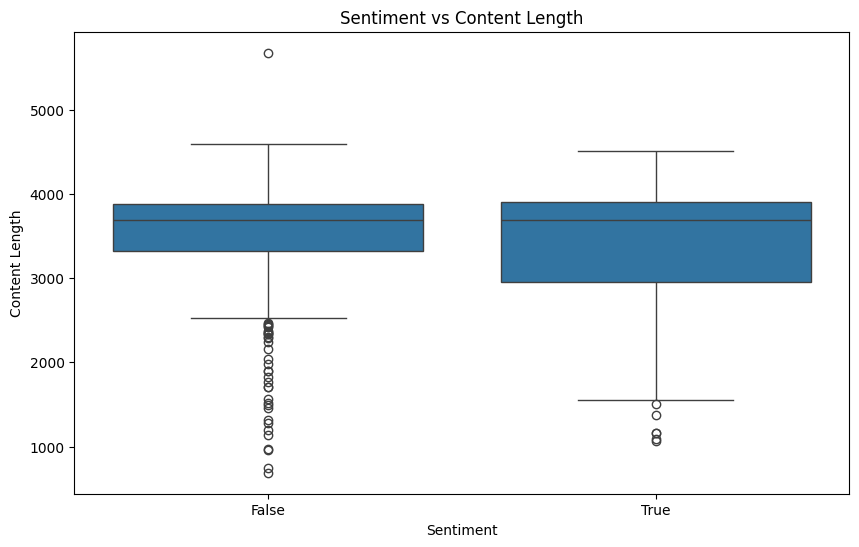

In [12]:
# Plot sentiment vs. content length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Content_Length', data=diversity_df)
plt.title('Sentiment vs Content Length')
plt.xlabel('Sentiment')
plt.ylabel('Content Length')
plt.show()


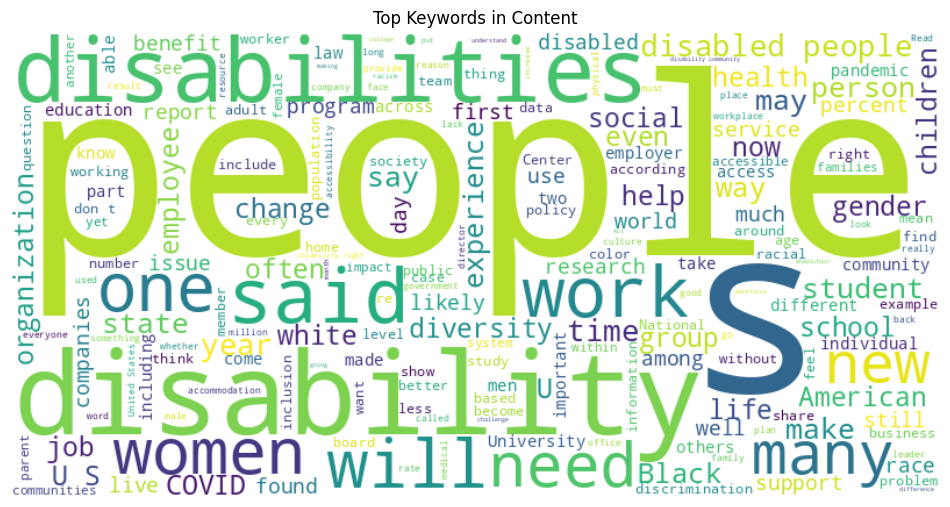

In [14]:
from wordcloud import WordCloud

# Combine all the content into a single string
text = ' '.join(diversity_df['Content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Content')
plt.show()


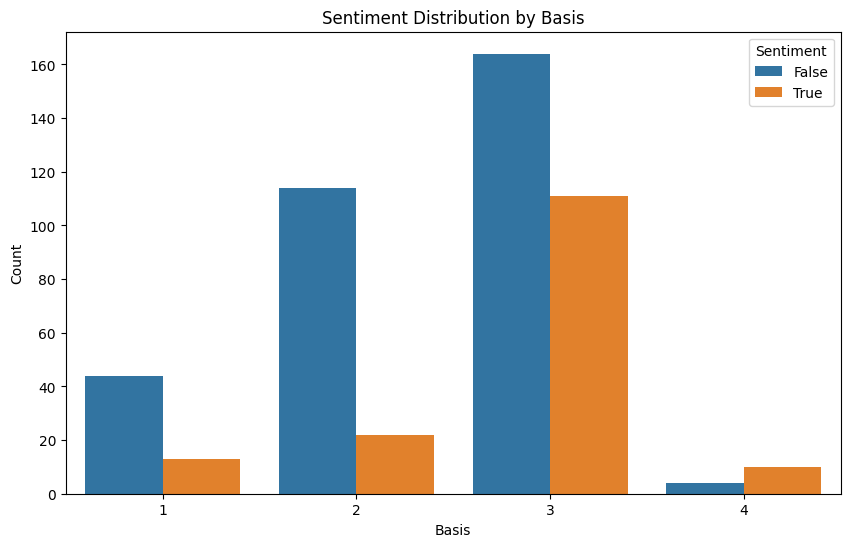

In [16]:
# Plot sentiment distribution by basis (if 'Basis' is a meaningful categorical feature)
plt.figure(figsize=(10, 6))
sns.countplot(x='Basis', hue='Sentiment', data=diversity_df)
plt.title('Sentiment Distribution by Basis')
plt.xlabel('Basis')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


Load and Tokenize Text Data

In [21]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
def tokenize(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")

# Apply tokenization to train, validation, and test sets
train_inputs = tokenize(train_df['Content'].tolist())
val_inputs = tokenize(val_df['Content'].tolist())
test_inputs = tokenize(test_df['Content'].tolist())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Create TensorFlow Datasets

In [22]:
# Create TensorFlow datasets
def create_tf_dataset(input_ids, attention_mask, labels, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((
        {'input_ids': input_ids, 'attention_mask': attention_mask},
        labels
    ))
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

# Convert to TensorFlow datasets
train_dataset = create_tf_dataset(
    train_inputs['input_ids'].numpy(),
    train_inputs['attention_mask'].numpy(),
    train_df['Sentiment'].astype(int).values
)

val_dataset = create_tf_dataset(
    val_inputs['input_ids'].numpy(),
    val_inputs['attention_mask'].numpy(),
    val_df['Sentiment'].astype(int).values
)

test_dataset = create_tf_dataset(
    test_inputs['input_ids'].numpy(),
    test_inputs['attention_mask'].numpy(),
    test_df['Sentiment'].astype(int).values
)


Load and Compile the BERT Model

In [23]:
# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train the Model with Validation

In [24]:
# Train the model with validation
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50
)


Epoch 1/50
44/44 [==============================] - 102s 1s/step - loss: 0.6340 - sparse_categorical_accuracy: 0.6590 - val_loss: 0.5250 - val_sparse_categorical_accuracy: 0.7692
Epoch 2/50
44/44 [==============================] - 46s 1s/step - loss: 0.5820 - sparse_categorical_accuracy: 0.6908 - val_loss: 0.4894 - val_sparse_categorical_accuracy: 0.7692
Epoch 3/50
44/44 [==============================] - 46s 1s/step - loss: 0.4637 - sparse_categorical_accuracy: 0.7861 - val_loss: 0.5299 - val_sparse_categorical_accuracy: 0.7692
Epoch 4/50
44/44 [==============================] - 44s 1s/step - loss: 0.3891 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.4365 - val_sparse_categorical_accuracy: 0.8205
Epoch 5/50
44/44 [==============================] - 46s 1s/step - loss: 0.2095 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.2946 - val_sparse_categorical_accuracy: 0.8462
Epoch 6/50
44/44 [==============================] - 45s 1s/step - loss: 0.0909 - sparse_categorical_accuracy:

Plotting Accuracy and Loss

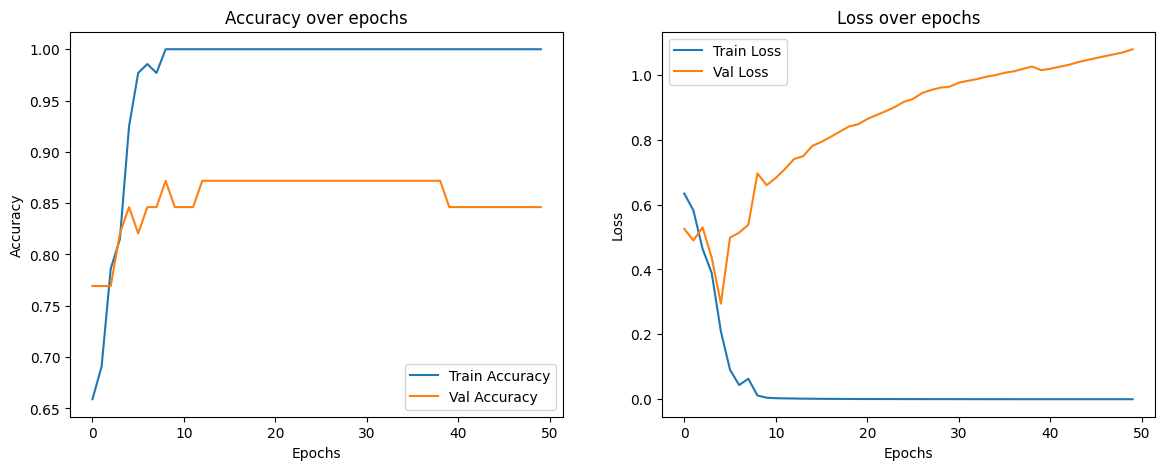

In [26]:
# Plot accuracy and loss
def plot_metrics(history):
    # Accuracy plot
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)


Evaluate the Model on the Test Dataset

In [25]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


13/13 [==============================] - 4s 312ms/step - loss: 1.5752 - sparse_categorical_accuracy: 0.7835
Test Loss: 1.5751564502716064
Test Accuracy: 0.7835051417350769


In [29]:
from sklearn.metrics import classification_report

# Predict the classes for the test dataset
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_df['Sentiment'].astype(int).values

# Print the classification report
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))


13/13 [==============================] - 4s 324ms/step
              precision    recall  f1-score   support

    Negative       0.66      0.75      0.70        64
    Positive       0.33      0.24      0.28        33

    accuracy                           0.58        97
   macro avg       0.50      0.50      0.49        97
weighted avg       0.55      0.58      0.56        97



In [32]:
# Prepare prediction function with detailed explanations
def predict_with_detailed_explanation(texts):
    inputs = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    predictions = model(input_ids, attention_mask=attention_mask)[0]
    predicted_labels = tf.argmax(predictions, axis=1).numpy()

    # Map the labels to detailed explanations
    label_map = {
        0: "Negative: The text indicates a negative sentiment or unfavorable opinion.",
        1: "Positive: The text indicates a positive sentiment or favorable opinion."
    }
    detailed_predictions = [label_map[label] for label in predicted_labels]

    return detailed_predictions

# Sample texts for prediction
sample_texts = [
    "This new policy aims to promote cultural diversity in the workplace.",
    "I am excited about the new technological advancements.",
    "New GP appointment rules in England are alarming and dangerous",
    "i  like ambieance but i hate the food it was not a bad experiance"
]

predictions = predict_with_detailed_explanation(sample_texts)
for text, prediction in zip(sample_texts, predictions):
    print(f"Text: {text}\nPrediction: {prediction}\n")


Text: This new policy aims to promote cultural diversity in the workplace.
Prediction: Positive: The text indicates a positive sentiment or favorable opinion.

Text: I am excited about the new technological advancements.
Prediction: Positive: The text indicates a positive sentiment or favorable opinion.

Text: New GP appointment rules in England are alarming and dangerous
Prediction: Negative: The text indicates a negative sentiment or unfavorable opinion.

Text: i  like ambieance but i hate the food it was not a bad experiance
Prediction: Negative: The text indicates a negative sentiment or unfavorable opinion.

